In [1]:
import os
os.chdir("/Users/a1002142/Desktop/private_repo/expectation/")
from expectation.seqtest.sequential_e_testing import SequentialTest, TestType
from expectation.utils.helper_functions import plot_sequential_test

import numpy as np

import matplotlib.pyplot as plt

In [2]:
test = SequentialTest(test_type="mean", null_value=0, alternative="greater")

In [3]:
result = test.update([1.2, 0.8, 1.5])

In [4]:
print(f"Reject null: {result.reject_null}")
print(f"E-value: {result.e_value}")

print(f"Cumulative e-value: {result.e_process.cumulative_value}")
print(f"E-power: {result.e_power}")

Reject null: False
E-value: 4.177261257838122
Cumulative e-value: 4.177261257838122
E-power: None


Batch mean: 0.84
E-value: 1.66
Cumulative: 1.66
Reject H0: False

E-power: None
Batch mean: -1.86
E-value: 0.11
Cumulative: 0.18
Reject H0: False

E-power: -0.865924546718749
Batch mean: 0.79
E-value: 10.53
Cumulative: 1.86
Reject H0: False

E-power: 0.207509031436393
Batch mean: -2.43
E-value: 0.06
Cumulative: 0.10
Reject H0: False

E-power: -0.5638378625611566
Batch mean: 1.56
E-value: 25728.05
Cumulative: 2697.24
Reject H0: True

E-power: 1.5799971155209578
Batch mean: 1.38
E-value: 2744.69
Cumulative: 7403093.02
Reject H0: True

E-power: 2.6362347411523963
Batch mean: 0.47
E-value: 1.80
Cumulative: 13291899.26
Reject H0: True

E-power: 2.34323790420377


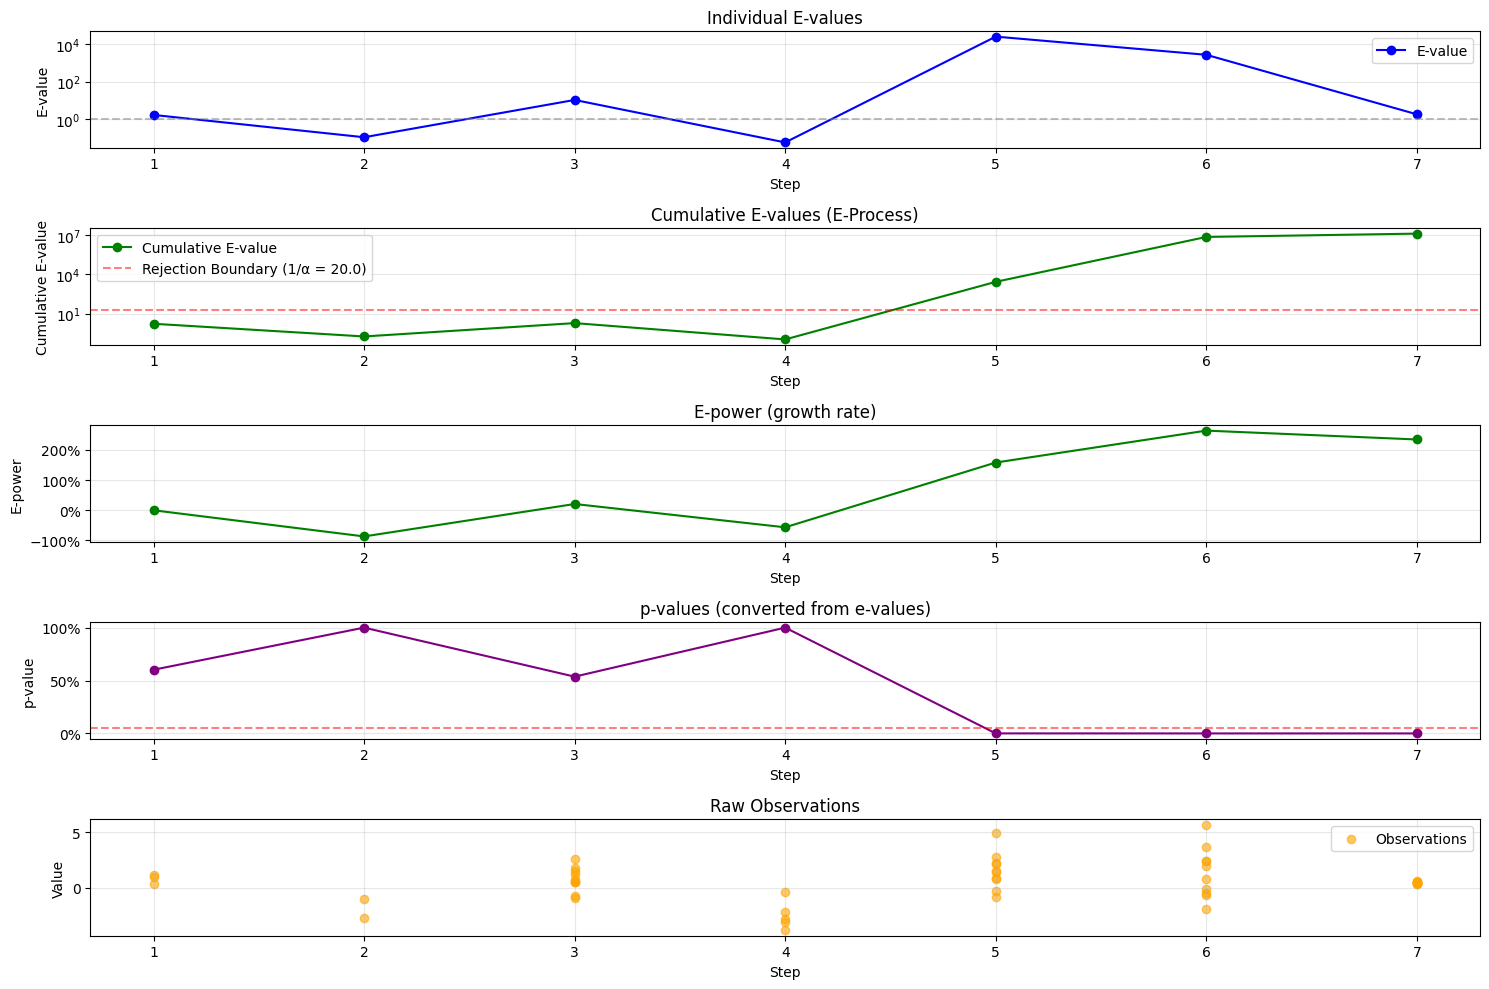

In [5]:

test = SequentialTest(
    test_type=TestType.MEAN,
    null_value=0,
    alternative="greater"
)

# Generate some data
np.random.seed(42)
data_batches = [
    np.random.normal(0.5, 1, 3),  # Batch 1
    np.random.normal(-2.5, 1, 2),  # Batch 2
    np.random.normal(1, 1, 10),  # Batch 3
    np.random.normal(-1, 2, 5),    # Batch 4
    np.random.normal(2, 2, 10),
    np.random.normal(2, 2, 10),
    np.random.normal(0.5, 0.1, 10),
]

# Run test
for batch in data_batches:
    result = test.update(batch)
    print(f"Batch mean: {np.mean(batch):.2f}")
    print(f"E-value: {result.e_value:.2f}")
    print(f"Cumulative: {result.e_process.cumulative_value:.2f}")
    print(f"Reject H0: {result.reject_null}\n")
    print(f"E-power: {result.e_power}")

# Plot results
history_df = test.get_history_df()
fig, axes = plot_sequential_test(history_df, log=True)
plt.show()

In [6]:
test.get_history_df()

,step,observations,eValue,ePower,cumulativeEValue,rejectNull,timestamp,pValue
0,1,"[0.9967141530112327, 0.36173569882881534, 1.14...",1.661242,NaN,1.661242e+00,False,1.732906e+09,6.019592e-01
1,2,"[-0.9769701435919746, -2.734153374723336]",0.106521,-0.865925,1.769569e-01,False,1.732906e+09,1.000000e+00
2,3,"[0.7658630430508194, 2.5792128155073915, 1.767...",10.531557,0.207509,1.863632e+00,False,1.732906e+09,5.365867e-01
3,4,"[-2.1245750584819456, -3.0256622406688476, -0....",0.056254,-0.563838,1.048367e-01,False,1.732906e+09,1.000000e+00
4,5,"[4.931297537843108, 1.5484473990269287, 2.1350...",25728.047748,1.579997,2.697243e+03,True,1.732906e+09,3.707489e-04
5,6,"[0.7965867755412062, 5.704556369017876, 1.9730...",2744.688502,2.636235,7.403093e+06,True,1.732906e+09,1.350787e-07
6,7,"[0.573846657999541, 0.5171368281189971, 0.4884...",1.795452,2.343238,1.329190e+07,True,1.732906e+09,7.523379e-08
